In [1]:
import pandas as pd

train_output=pd.read_csv("resources/analyze/ver2/train_output.csv")
valid_output=pd.read_csv("resources/analyze/ver2/valid_output.csv")

total_output=pd.concat((train_output,valid_output),axis=0)

In [4]:
total_output.to_excel("total_prediction_result.xlsx",engine='openpyxl')

In [6]:
# import matplotlib.font_manager
# font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# [matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]

In [7]:
from matplotlib import pyplot as plt
plt.rc('font',family='NanumGothic')

In [8]:
def frequency_plot(data,title_name):
    topic_map={0: '생활문화',1:'스포츠',2:'정치',3:'사회',4:'IT과학',5:'경제',6:'세계'}

    fig,ax= plt.subplots(1,1,figsize=(15,8))
    xlabel=list(set(data['target']))
    ax.set_title(f"{title_name}")
    ax.bar(xlabel,data['target'].value_counts(sort=False))
    print(data['target'].value_counts(sort=False))

    ax.set_xticks(range(len(xlabel)))
    ax.set_xticklabels([f"{x} - {topic_map[x]}" for x in xlabel])  # xlabel의 정수 값을 topic_map에서 매핑하여 라벨로 설정



**labels**
'생활문화': 0
'스포츠': 1
'정치': 2
'사회': 3 
'IT과학': 4 
'경제': 5 
'세계': 6

target
0    1307
1    1340
2    1431
3    1276
4    1203
5    1056
6    1412
Name: count, dtype: int64


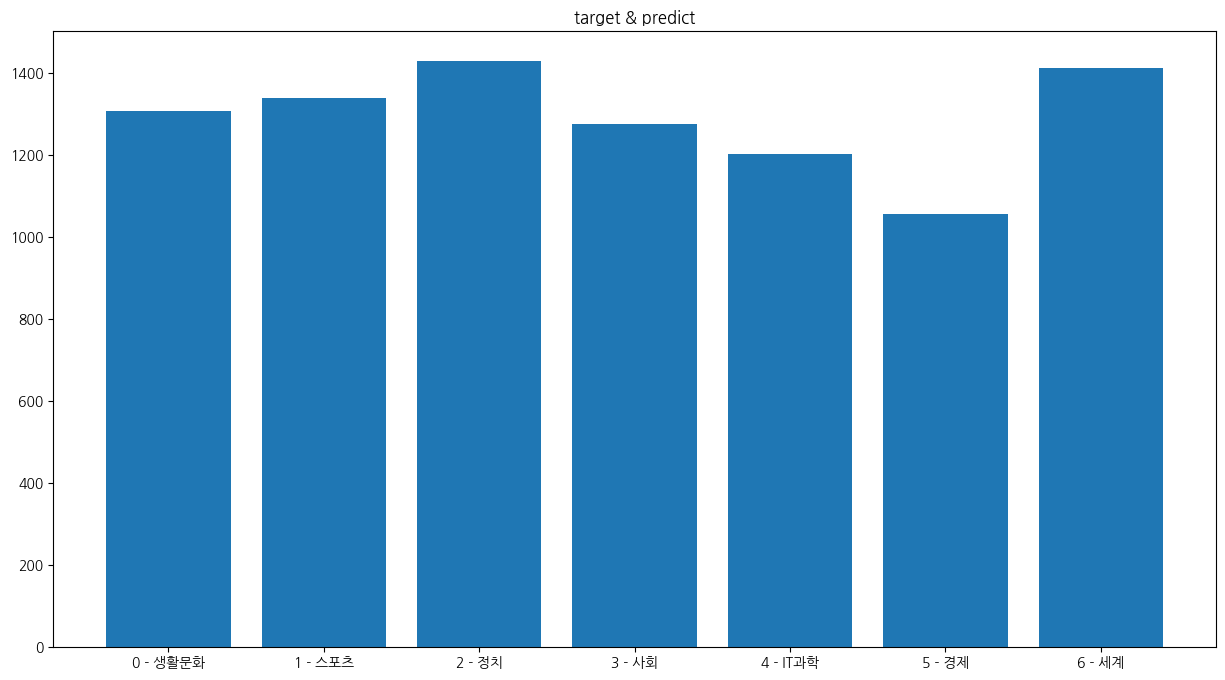

In [9]:
frequency_plot(total_output,'target & predict')

In [10]:
wrong_answer_df=total_output[total_output['target']!=total_output['predicted_value']]
wrong_answer_df

,index,ID,text,target,target_name,source,similarity,predicted_value
13,378,ynat-v1_train_00087,"2023년 수능, 전국적으로 안정적인 진행... 학생들의 건강과 안전이 최우선입니다.",0,생활문화,noisy,0.16534,3
33,606,ynat-v1_train_00132,올해 경제 성장 전망에 대해 전문가들의 논평이 나오고 있다.,0,생활문화,noisy,0.19031,5
34,607,ynat-v1_train_00132,"바르셀로나를 떠나 빌바오에 합류한 메시, 축구계의 큰 파도.",0,생활문화,noisy,0.18133,1
35,608,ynat-v1_train_00132,올해 경제 성장률 전망에 대해 전문가들이 의견을 나누고 있다,0,생활문화,noisy,0.18269,5
40,619,ynat-v1_train_00135,"MLB 로키스, 피츠버그와 경기! 뉴에이지 메달리스트 감독 취임",0,생활문화,noisy,0.18749,1
...,...,...,...,...,...,...,...,...
937,10642,ynat-v1_train_02587,삼성전자가 갤럭시 S9 퀸툼의 새로운 버전을 출시합니다...AI로 업무 효율을 극대...,6,세계,noisy,0.19390,4
940,5830,ynat-v1_train_01346,"초등학교 3부 교육, 새로운 Y 교육 프로그램 도입",6,세계,noisy,0.17432,3
946,1504,ynat-v1_train_00379,"이서훈 국가정보원장이 ""민간단체와 협력해 헝가리의 인권 문제 해결""을 강조한다.",6,세계,noisy,0.20103,2
950,265,ynat-v1_train_00058,한 는 유 치료제 오 솔 美 임 본격화,6,세계,noisy,0.21316,4


target
0    148
1     40
2     75
3    188
4    104
5    164
6    192
Name: count, dtype: int64


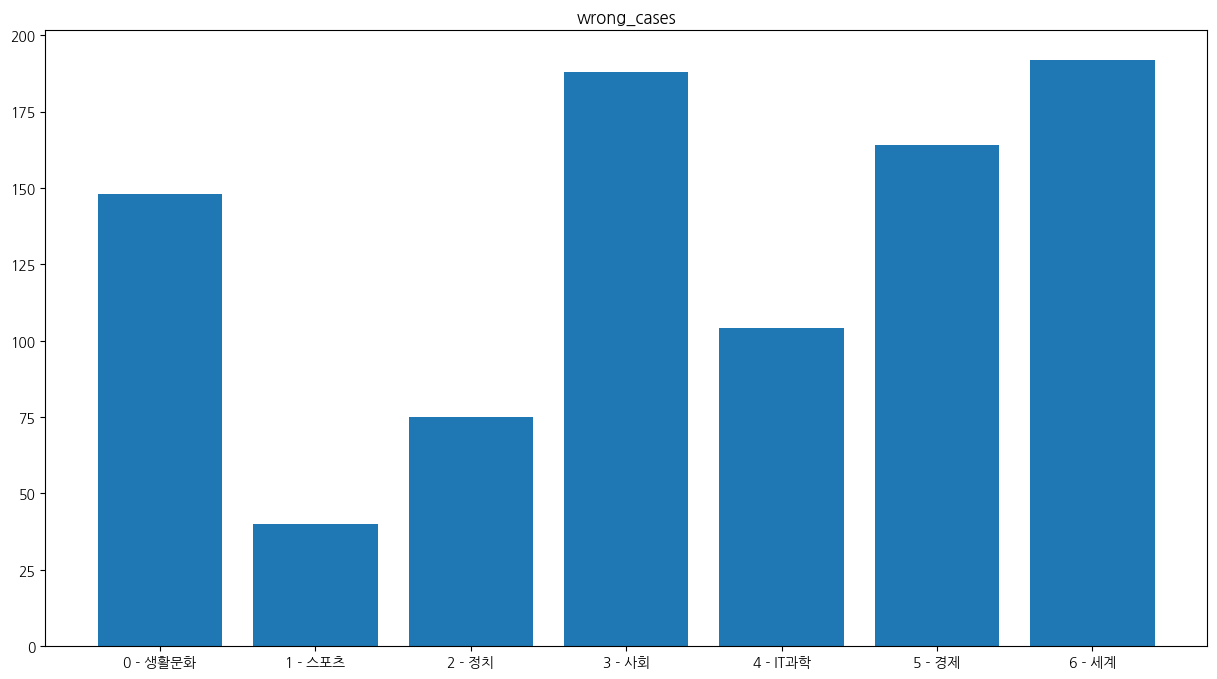

In [11]:
frequency_plot(wrong_answer_df,'wrong_cases')

In [21]:
def select_frequency_plot(data,select):
    topic_map={0: '생활문화',1:'스포츠',2:'정치',3:'사회',4:'IT과학',5:'경제',6:'세계'}

    fig,ax= plt.subplots(1,1,figsize=(15,8))
    xlabel=list(set(data[data['predicted_value']==select]['target']))

    ax.set_title(f"selected topic : {topic_map[select]}")
    ax.bar(xlabel,data[data['predicted_value']==select]['target'].value_counts(sort=False))
    print(data[data['predicted_value']==select]['target'].value_counts(sort=False))

    ax.set_xticks(xlabel)
    ax.set_xticklabels([f"{x} - {topic_map[x]}" for x in xlabel])  # xlabel의 정수 값을 topic_map에서 매핑하여 라벨로 설정



target
0     9
1     3
2    39
3    24
4    13
5     8
Name: count, dtype: int64


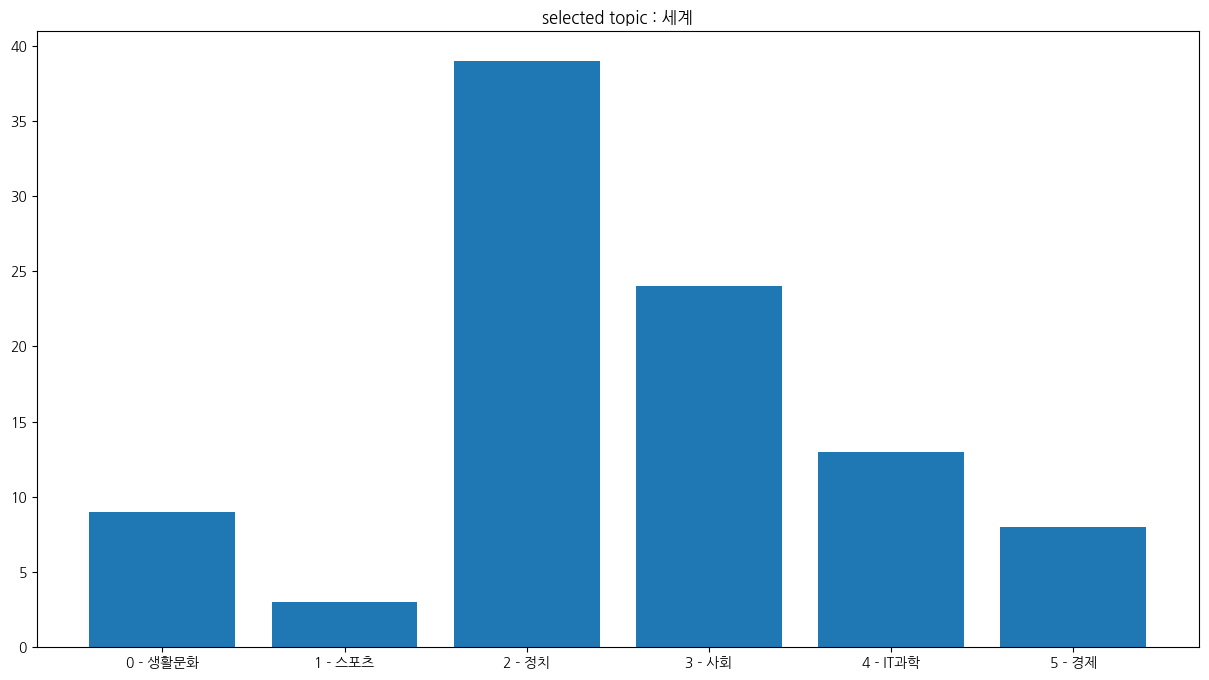

In [28]:
select_frequency_plot(wrong_answer_df,6)

In [29]:
wrong_answer_df.to_excel("wrong_predict.xlsx",engine='openpyxl')